# Intramolecular secondary structure of barcodes in SeqWalk libraries

Running all cells of `library_generation.ipynb` will generate files with sequences that can be analyzed by running this notebook. No adjustments of filenames are necessary. 

In [1]:
import nupack as nu
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

rcParams['figure.dpi'] = 300

c = nu.Model(material="dna", celsius=22, sodium=0.05, magnesium=0.002)

In [2]:
def mfe_unpaired(seq, model):
    A = nu.Strand(seq, name="A")
    return sum(1 for s in str(nu.mfe([A], model=model)[0].structure) if s == ".")/len(seq)

def gc(seq):
    return sum( 1 for s in seq if s in ["G", "C"])/len(seq)

In [3]:
d = {
    "Alphabet" : [],
    "k" : [],
    "L" : [],
    "Unpaired" : [],
    "GC content" : []
}

for SSM_k in [6, 8, 10]:
    for L in [10, 15, 25]:
        for a in [3, 4]:
            filename = "SSM_%d-L_%d-a_%d" % (SSM_k, L, a)
            f = open(filename, "r")
            seqs = [s.strip() for s in f.readlines()]
            f.close
            for seq in seqs:
                d["Alphabet"].append(a)
                d["k"].append(SSM_k)
                d["L"].append(L)
                d["Unpaired"].append(mfe_unpaired(seq, c))
                d["GC content"].append(gc(seq))

data = pd.DataFrame(d)
data.to_csv("secondary_structs.csv")

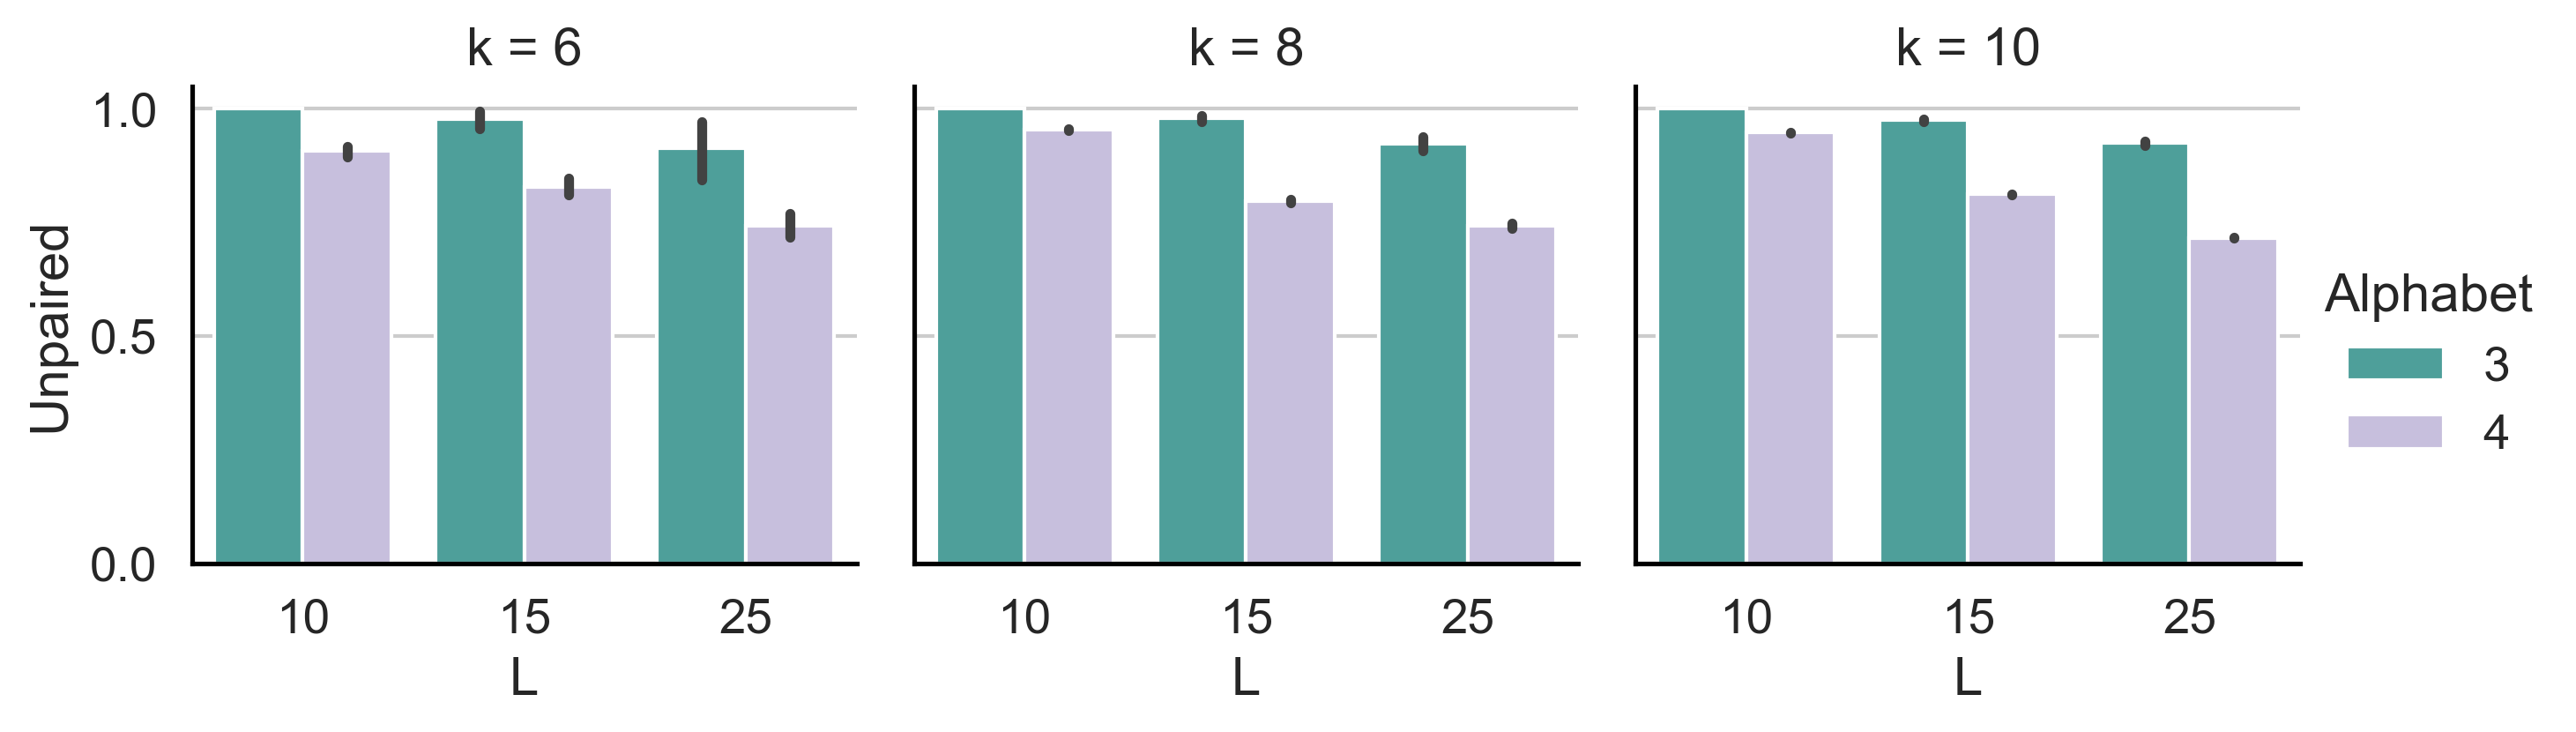

In [7]:
sns.set(font_scale=1.2, style='whitegrid')
rcParams['axes.edgecolor'] = 'black'
# g = sns.FacetGrid(data, row="k", col="L", hue="Alphabet")
g = sns.catplot(data = data, y = "Unpaired", x="L", col="k", hue="Alphabet", 
                kind="bar", height=3, aspect=1,
               palette=['#40ada6', '#c4bae2'])
plt.ylabel('Fraction unpaired')
plt.savefig("EF3_sn6.pdf", bbox_inches = 'tight')